In [2]:
import pandas as pd
df = pd.read_csv("df_cut_no_nan.csv")
df.head()

,zpid,sale_price,bedrooms,bathrooms,living_area,year_built,zipcode,lat,lon
0,1077522,78000.0,2.0,1.0,1816.0,1918.0,46201.0,39.761307,-86.116610
1,1085356,245000.0,2.0,2.0,2206.0,1910.0,46201.0,39.780403,-86.123510
2,1104044,95200.0,3.0,1.0,2066.0,1920.0,46201.0,39.777847,-86.096085
3,1108751,149000.0,2.0,2.0,1260.0,1955.0,46201.0,39.760080,-86.115610
4,1082586,150000.0,2.0,1.0,1824.0,1925.0,46201.0,39.763660,-86.091415


In [3]:
import numpy as np

R = 6371  # rayon de la Terre en km
center_lat, center_lon = np.radians(39.7684), np.radians(-86.1581)

lat = np.radians(df['lat'])
lon = np.radians(df['lon'])

dlat = lat - center_lat
dlon = lon - center_lon

a = np.sin(dlat/2)**2 + np.cos(center_lat) * np.cos(lat) * np.sin(dlon/2)**2
df['distance_to_downtown_km'] = 2 * R * np.arcsin(np.sqrt(a))


In [4]:
# Simple et direct
df['house_age'] = 2026 - df['year_built']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5653 entries, 0 to 5652
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   zpid                     5653 non-null   int64  
 1   sale_price               5653 non-null   float64
 2   bedrooms                 5653 non-null   float64
 3   bathrooms                5653 non-null   float64
 4   living_area              5653 non-null   float64
 5   year_built               5653 non-null   float64
 6   zipcode                  5653 non-null   float64
 7   lat                      5653 non-null   float64
 8   lon                      5653 non-null   float64
 9   distance_to_downtown_km  5653 non-null   float64
 10  house_age                5653 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 485.9 KB


In [6]:
df.head()

,zpid,sale_price,bedrooms,bathrooms,living_area,year_built,zipcode,lat,lon,distance_to_downtown_km,house_age
0,1077522,78000.0,2.0,1.0,1816.0,1918.0,46201.0,39.761307,-86.116610,3.632917,108.0
1,1085356,245000.0,2.0,2.0,2206.0,1910.0,46201.0,39.780403,-86.123510,3.243433,116.0
2,1104044,95200.0,3.0,1.0,2066.0,1920.0,46201.0,39.777847,-86.096085,5.403062,106.0
3,1108751,149000.0,2.0,2.0,1260.0,1955.0,46201.0,39.760080,-86.115610,3.747756,71.0
4,1082586,150000.0,2.0,1.0,1824.0,1925.0,46201.0,39.763660,-86.091415,5.723979,101.0


In [7]:
from sklearn.preprocessing import OneHotEncoder

# Nouveau paramètre pour sklearn ≥ 1.4
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

zipcode_encoded = encoder.fit_transform(df[['zipcode']])

zipcode_encoded_df = pd.DataFrame(
    zipcode_encoded,
    columns=encoder.get_feature_names_out(['zipcode']),
    index=df.index
)

df_encoded = pd.concat([df, zipcode_encoded_df], axis=1)


In [8]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5653 entries, 0 to 5652
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   zpid                     5653 non-null   int64  
 1   sale_price               5653 non-null   float64
 2   bedrooms                 5653 non-null   float64
 3   bathrooms                5653 non-null   float64
 4   living_area              5653 non-null   float64
 5   year_built               5653 non-null   float64
 6   zipcode                  5653 non-null   float64
 7   lat                      5653 non-null   float64
 8   lon                      5653 non-null   float64
 9   distance_to_downtown_km  5653 non-null   float64
 10  house_age                5653 non-null   float64
 11  zipcode_46032.0          5653 non-null   float64
 12  zipcode_46033.0          5653 non-null   float64
 13  zipcode_46037.0          5653 non-null   float64
 14  zipcode_46038.0         

In [9]:
df = df_encoded

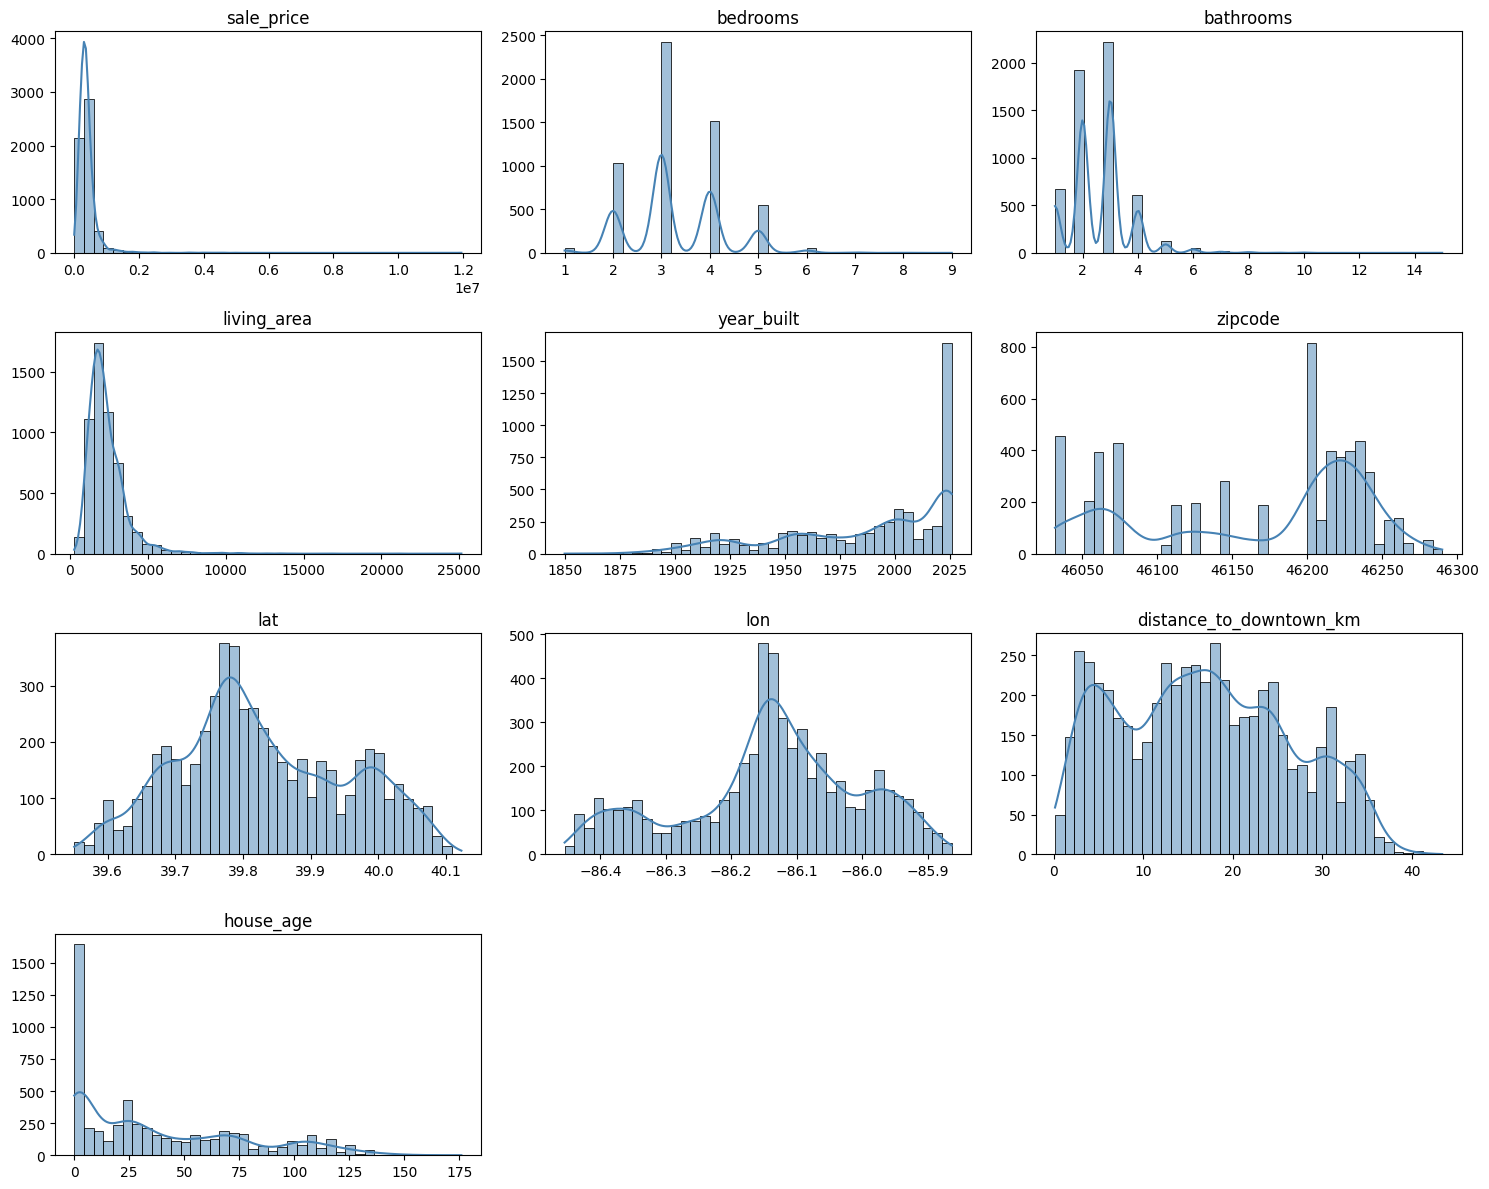

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# On sélectionne les colonnes numériques
num_cols = df.select_dtypes(include=[np.number]).columns

# On exclut zpid, les colonnes one-hot (qui commencent par "zipcode_")
cols_to_plot = [
    c for c in num_cols
    if not c.startswith("zipcode_") and c not in ["zpid"]
]

# Tracer toutes les distributions
n = len(cols_to_plot)
ncols = 3
nrows = int(np.ceil(n / ncols))

plt.figure(figsize=(15, nrows * 3))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(df[col], bins=40, kde=True, color="steelblue")
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


In [11]:
import numpy as np

cols_to_log = ['sale_price', 'living_area', 'house_age']

# Crée les nouvelles colonnes avec log1p et préfixe 'log_'
for col in cols_to_log:
    df['log_' + col] = np.log1p(df[col])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5653 entries, 0 to 5652
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   zpid                     5653 non-null   int64  
 1   sale_price               5653 non-null   float64
 2   bedrooms                 5653 non-null   float64
 3   bathrooms                5653 non-null   float64
 4   living_area              5653 non-null   float64
 5   year_built               5653 non-null   float64
 6   zipcode                  5653 non-null   float64
 7   lat                      5653 non-null   float64
 8   lon                      5653 non-null   float64
 9   distance_to_downtown_km  5653 non-null   float64
 10  house_age                5653 non-null   float64
 11  zipcode_46032.0          5653 non-null   float64
 12  zipcode_46033.0          5653 non-null   float64
 13  zipcode_46037.0          5653 non-null   float64
 14  zipcode_46038.0         

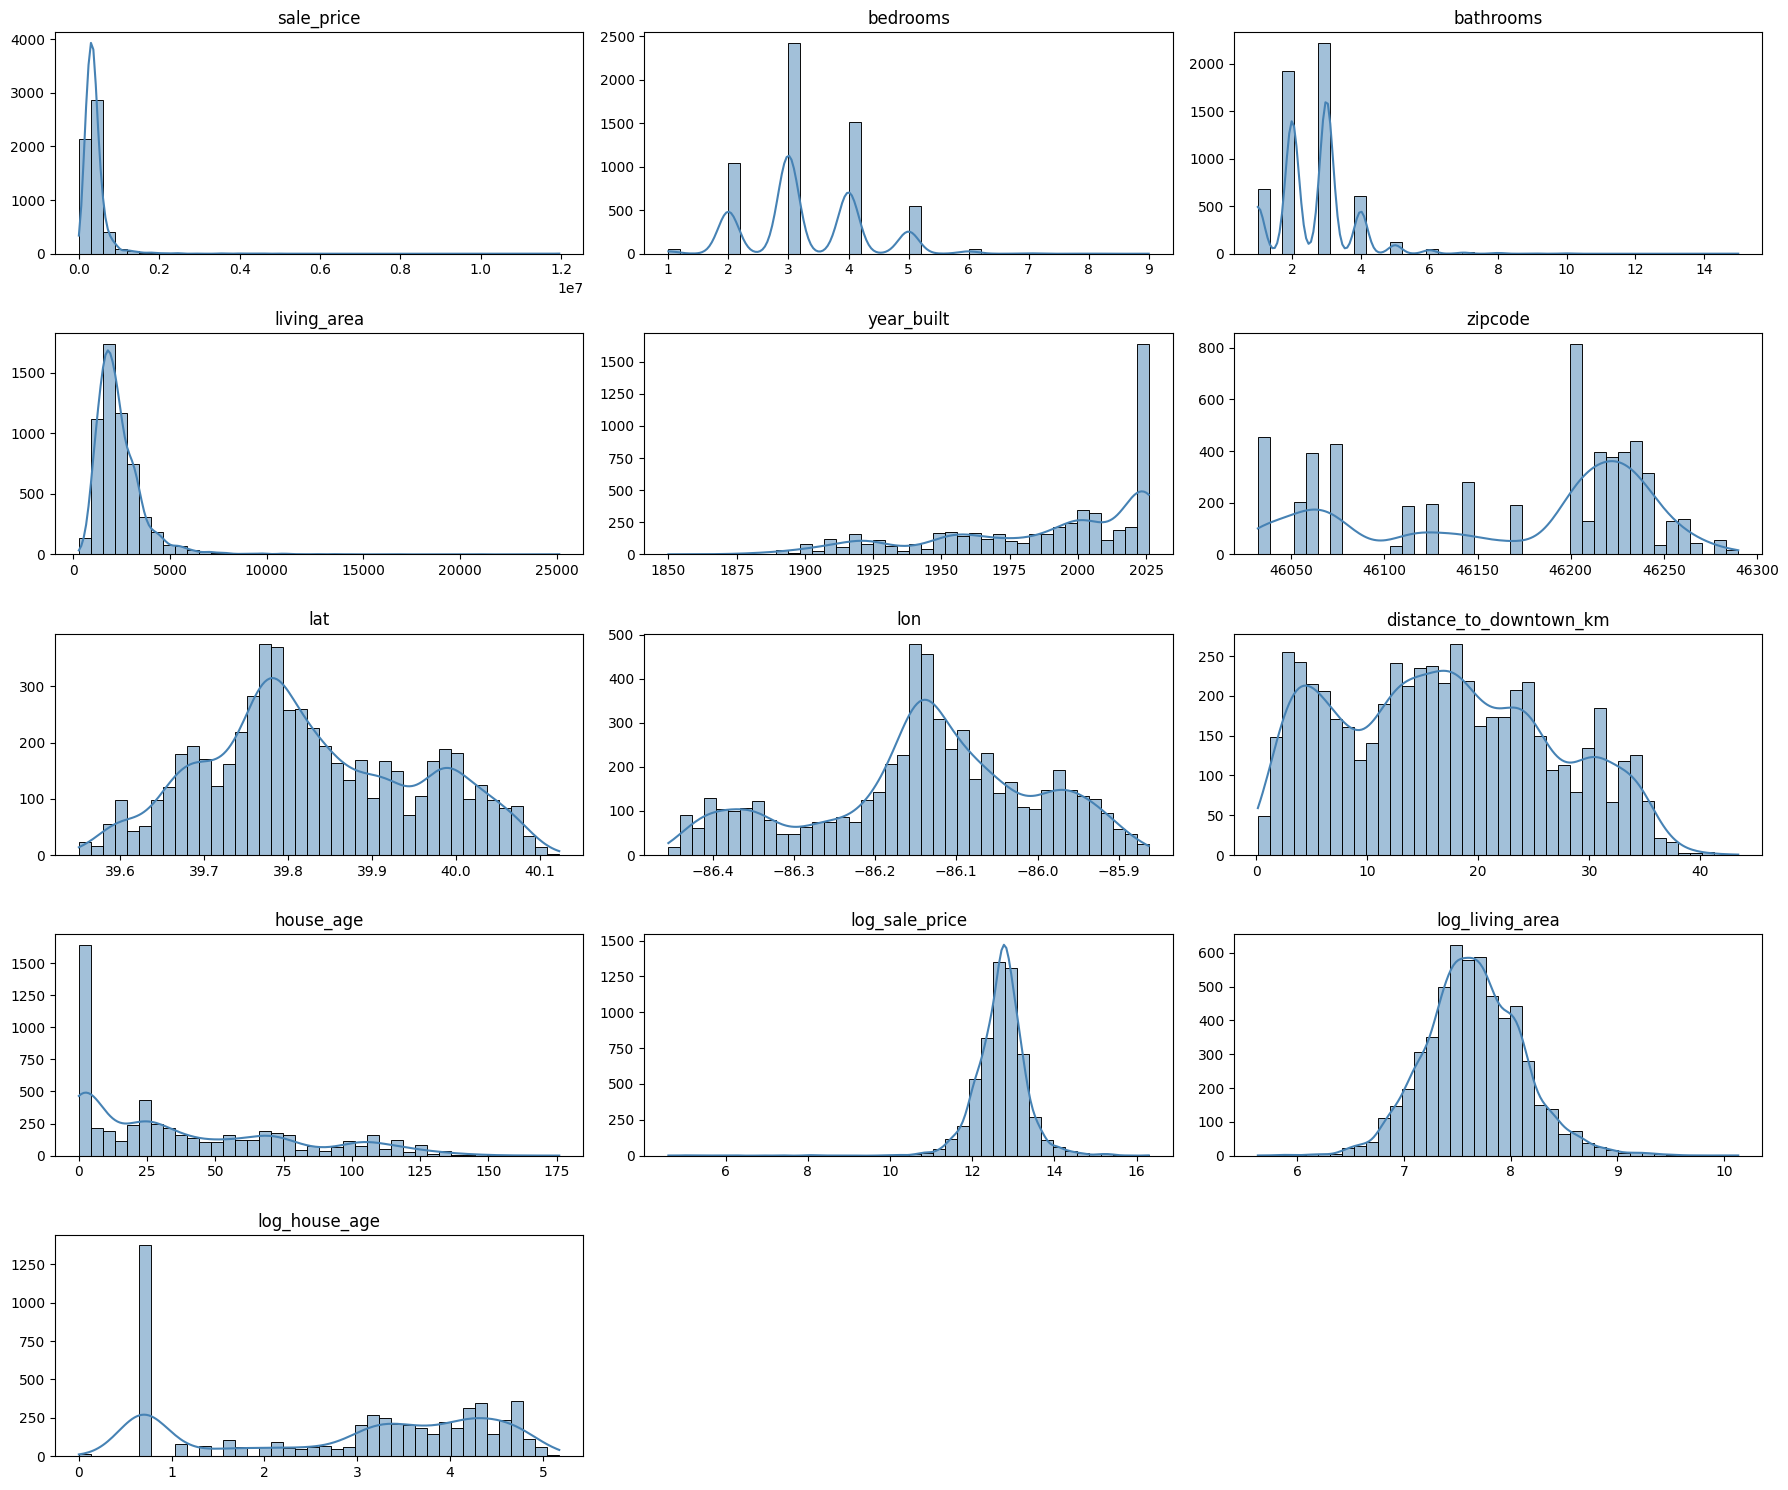

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# On sélectionne les colonnes numériques
num_cols = df.select_dtypes(include=[np.number]).columns

# On exclut zpid, les colonnes one-hot (qui commencent par "zipcode_")
cols_to_plot = [
    c for c in num_cols
    if not c.startswith("zipcode_") and c not in ["zpid"]
]

# Tracer toutes les distributions
n = len(cols_to_plot)
ncols = 3
nrows = int(np.ceil(n / ncols))

plt.figure(figsize=(18, nrows * 3))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(df[col], bins=40, kde=True, color="steelblue")
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


In [14]:
# Cellule 13 (version v2)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

# -----------------------------
# Variables d'entrée / sortie
# -----------------------------
target = 'log_sale_price'

# Features numériques initiales
features_numeric = ['bedrooms', 'bathrooms', 'lat', 'lon', 
                    'distance_to_downtown_km', 'log_living_area', 'log_house_age']

# Colonnes one-hot des zipcodes
zip_cols = [col for col in df.columns if col.startswith('zipcode_')]

# Ensemble complet des features
X = df[features_numeric + zip_cols]
y = df[target]

# -----------------------------
# Stratification par QUANTILES de prix
# -----------------------------

# On crée des gammes de prix (5 quantiles)
stratify_bins = pd.qcut(y, q=5, labels=False)

# Split 1 : Train (70%) et Temp (30%)
X_train, X_temp, y_train, y_temp, strat_train, strat_temp = train_test_split(
    X, y, stratify_bins, test_size=0.30, random_state=42
)

# Split 2 : Val (15%) et Test (15%)
stratify_bins_temp = pd.qcut(y_temp, q=5, labels=False)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, stratify=stratify_bins_temp, test_size=0.5, random_state=42
)


In [15]:
# In[14]:

# normalisation / standardisation uniquement sur le train

# Colonnes à transformer
# -----------------------------
cols_standardize = ['log_living_area', 'log_house_age']
cols_normalize = ['bedrooms', 'bathrooms', 'lat', 'lon', 'distance_to_downtown_km']

# Colonnes à ne PAS transformer (les zipcodes OHE)
zip_cols = [col for col in X.columns if col.startswith('zipcode_')]

# -----------------------------
# Fit sur le TRAIN uniquement
# -----------------------------
# Note : X_train est l'ensemble non-scaled de la cellule [13]
scaler_standard = StandardScaler().fit(X_train[cols_standardize])
scaler_normal = MinMaxScaler().fit(X_train[cols_normalize])

# -----------------------------
# Transformation sur train / val / test
# -----------------------------
def transform_dataset(X):
    # 1. Standardisation
    X_standardized = pd.DataFrame(
        scaler_standard.transform(X[cols_standardize]),
        columns=cols_standardize,
        index=X.index
    )
    # 2. Normalisation
    X_normalized = pd.DataFrame(
        scaler_normal.transform(X[cols_normalize]),
        columns=cols_normalize,
        index=X.index
    )
    
    # 3. Récupération des colonnes zipcodes (NON transformées)
    X_zipcodes = X[zip_cols]
    
    # 4. Concaténation de l'ensemble des features
    return pd.concat([X_normalized, X_standardized, X_zipcodes], axis=1)

X_train_scaled = transform_dataset(X_train)
X_val_scaled = transform_dataset(X_val)
X_test_scaled = transform_dataset(X_test)

In [16]:
# Cellule 15 (version v2)

joblib.dump(scaler_standard, 'scaler_standard-v2.pkl')
joblib.dump(scaler_normal, 'scaler_normal-v2.pkl')

print("Données prêtes (v2) :")
print(f"Train : {X_train_scaled.shape}, Val : {X_val_scaled.shape}, Test : {X_test_scaled.shape}")
print("Scalers sauvegardés : scaler_standard-v2.pkl et scaler_normal-v2.pkl")


Données prêtes (v2) :
Train : (3957, 60), Val : (848, 60), Test : (848, 60)
Scalers sauvegardés : scaler_standard-v2.pkl et scaler_normal-v2.pkl


In [17]:
# Cellule 15bis : Export des paramètres des scalers au format CSV pour inspection

# Export du StandardScaler (moyennes et écart-types)
standard_params = pd.DataFrame({
    'feature': cols_standardize,
    'mean': scaler_standard.mean_,
    'std': np.sqrt(scaler_standard.var_)
})
standard_params.to_csv("scaler_standard-v2.csv", index=False)

# Export du MinMaxScaler (min et max utilisés)
normal_params = pd.DataFrame({
    'feature': cols_normalize,
    'min': scaler_normal.data_min_,
    'max': scaler_normal.data_max_
})
normal_params.to_csv("scaler_normal-v2.csv", index=False)

print("Scalers exportés au format CSV :")
print(" - scaler_standard-v2.csv")
print(" - scaler_normal-v2.csv")


Scalers exportés au format CSV :
 - scaler_standard-v2.csv
 - scaler_normal-v2.csv


In [18]:
df.to_csv("df_clean.csv", index=False)


In [19]:
# Cellule 17 (version v2)

X_train.to_csv("X_train-v2.csv", index=False)
y_train.to_csv("y_train-v2.csv", index=False)
X_val.to_csv("X_val-v2.csv", index=False)
y_val.to_csv("y_val-v2.csv", index=False)
X_test.to_csv("X_test-v2.csv", index=False)
y_test.to_csv("y_test-v2.csv", index=False)


In [20]:
# Cellule 18 (version v2)

X_train_scaled.to_csv("X_train_scaled-v2.csv", index=False)
X_val_scaled.to_csv("X_val_scaled-v2.csv", index=False)
X_test_scaled.to_csv("X_test_scaled-v2.csv", index=False)


In [47]:
df_y_train = pd.read_csv("y_train-v2.csv")
df_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   log_sale_price  3957 non-null   float64
dtypes: float64(1)
memory usage: 31.0 KB


In [41]:
df_train_scaled = pd.read_csv("X_train_scaled-v2.csv")
df_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bedrooms                 3957 non-null   float64
 1   bathrooms                3957 non-null   float64
 2   lat                      3957 non-null   float64
 3   lon                      3957 non-null   float64
 4   distance_to_downtown_km  3957 non-null   float64
 5   log_living_area          3957 non-null   float64
 6   log_house_age            3957 non-null   float64
 7   zipcode_46032.0          3957 non-null   float64
 8   zipcode_46033.0          3957 non-null   float64
 9   zipcode_46037.0          3957 non-null   float64
 10  zipcode_46038.0          3957 non-null   float64
 11  zipcode_46055.0          3957 non-null   float64
 12  zipcode_46060.0          3957 non-null   float64
 13  zipcode_46062.0          3957 non-null   float64
 14  zipcode_46074.0         

In [49]:
df_y_test = pd.read_csv("y_test-v2.csv")
df_y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   log_sale_price  848 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


In [43]:
df_test_scaled = pd.read_csv("X_test_scaled-v2.csv")
df_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bedrooms                 848 non-null    float64
 1   bathrooms                848 non-null    float64
 2   lat                      848 non-null    float64
 3   lon                      848 non-null    float64
 4   distance_to_downtown_km  848 non-null    float64
 5   log_living_area          848 non-null    float64
 6   log_house_age            848 non-null    float64
 7   zipcode_46032.0          848 non-null    float64
 8   zipcode_46033.0          848 non-null    float64
 9   zipcode_46037.0          848 non-null    float64
 10  zipcode_46038.0          848 non-null    float64
 11  zipcode_46055.0          848 non-null    float64
 12  zipcode_46060.0          848 non-null    float64
 13  zipcode_46062.0          848 non-null    float64
 14  zipcode_46074.0          8

In [51]:
df_y_val = pd.read_csv("y_val-v2.csv")
df_y_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   log_sale_price  848 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


In [45]:
df_val_scaled = pd.read_csv("X_val_scaled-v2.csv")
df_val_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bedrooms                 848 non-null    float64
 1   bathrooms                848 non-null    float64
 2   lat                      848 non-null    float64
 3   lon                      848 non-null    float64
 4   distance_to_downtown_km  848 non-null    float64
 5   log_living_area          848 non-null    float64
 6   log_house_age            848 non-null    float64
 7   zipcode_46032.0          848 non-null    float64
 8   zipcode_46033.0          848 non-null    float64
 9   zipcode_46037.0          848 non-null    float64
 10  zipcode_46038.0          848 non-null    float64
 11  zipcode_46055.0          848 non-null    float64
 12  zipcode_46060.0          848 non-null    float64
 13  zipcode_46062.0          848 non-null    float64
 14  zipcode_46074.0          8